## Lab 10: Final Lab
You can use external libraries for linear algebra operations but you are expected to write your own algorithms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Exercise 1
Implement your own versions of:
- Density peaks clustering (without the halo feature)
- Normalized Mutual Information (NMI)
- F-ratio

In [2]:
from dadapy import Data
from dadapy.plot import plot_DecGraph

from sklearn.metrics.cluster import normalized_mutual_info_score

Using the ```Aggregation``` dataset available at [this link](https://cs.joensuu.fi/sipu/datasets/) under Shape sets:
1. Use **your own** version of density peaks at several values of the  ```dc``` parameter and choose the one that maximises the NMI with the ground truth (third column).

Hint:
As a rule of thumb, ```dc``` should be chosen in such a way that, on average, between 1% and 2% of the data points are included in the neighbourhood.
Use the exponential kernel.

In [3]:
agg = np.loadtxt("../Datasets/Aggregation.txt")

In [4]:
print(agg.shape)
print(agg)

(788, 3)
[[15.55 28.65  2.  ]
 [14.9  27.55  2.  ]
 [14.45 28.35  2.  ]
 ...
 [ 8.5   3.25  5.  ]
 [ 8.1   3.55  5.  ]
 [ 8.15  4.    5.  ]]


In [5]:
y = agg[:,2]
X = agg[:,:2]

In [6]:
n_classes = len(np.unique(y))
print(n_classes)

7


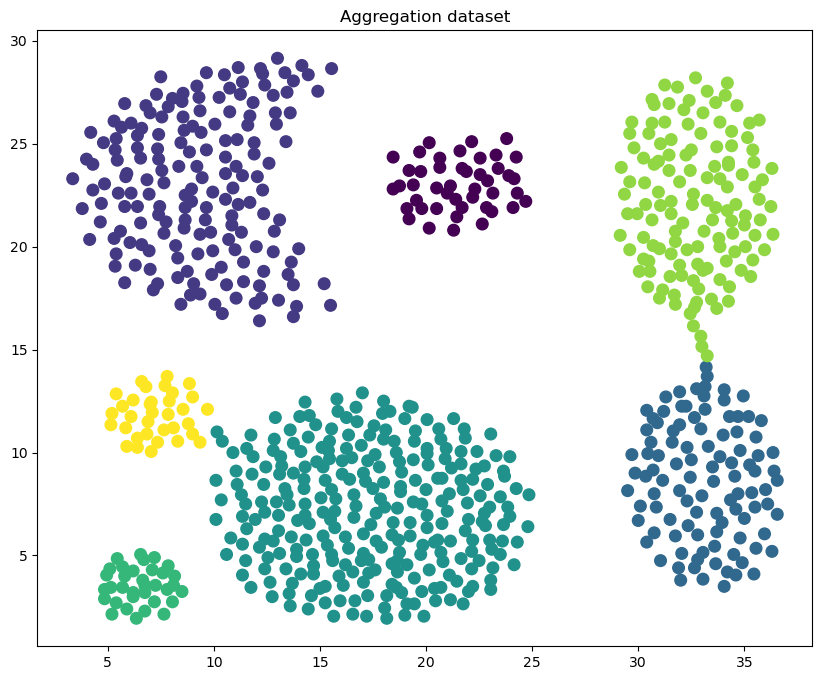

In [7]:
plt.figure(figsize=(10,8))

plt.scatter(X[:,0], X[:,1], c=y, s=70)
plt.title("Aggregation dataset")
plt.show()

In [8]:
from scipy.spatial.distance import cdist
dist = cdist(X,X, 'sqeuclidean')

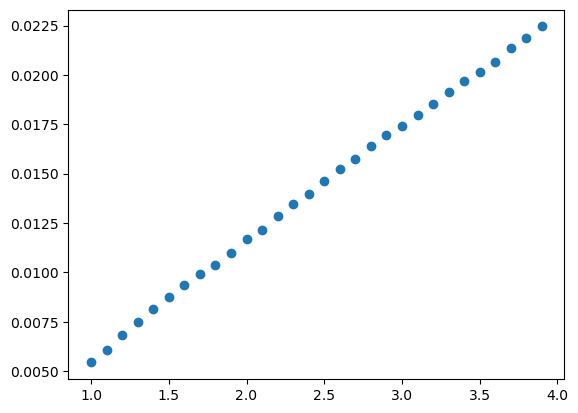

In [9]:
def cutoff(dist, dc):
    return 1 if dist < dc else 0   #you can also check the number of NNs in a ball of radius dc 

dc_range = np.arange(1,4,0.1)

#'dc' parameter is such that, on average, 1-2% of the points are within the neighbourhood
average=np.zeros(len(dc_range))
for i_dc, dc in enumerate(dc_range):
    num_pt=np.zeros(dist.shape[0])

    for i in range(dist.shape[0]):
        for j in range(i+1, dist.shape[0]):
            num_pt[i] += cutoff(dist[i,j], dc=dc) #indicate if the points are within distance 'dc' from one another
            num_pt[j] += cutoff(dist[i,j], dc=dc) #note that this value is saved twice (both for index i and index j) -> check that this is done also if you use the radius_neighbour
    
    average[i_dc] = np.mean(num_pt)

average = average / X.shape[0] 

plt.scatter(dc_range, average)
plt.show()

In [10]:
candidate_dcs = dc_range[(average>0.01)*(average<0.02)] #find good candidates for the 'dc' parameters
print(candidate_dcs)

[1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4]


Computation of distances started
Computation of the distances up to 787 NNs started
0.29 seconds for computing distances
Number of points for which self.delta needed call to cdist= 0


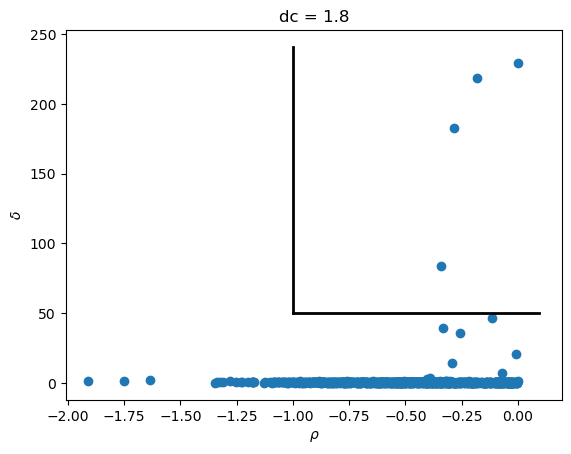

Computation of distances started
Computation of the distances up to 787 NNs started
0.10 seconds for computing distances
Number of points for which self.delta needed call to cdist= 0


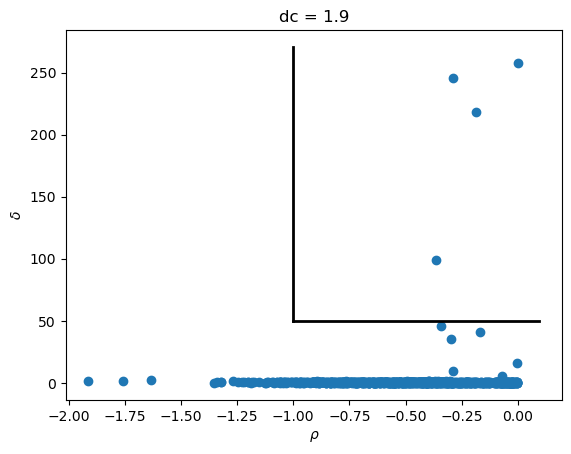

Computation of distances started
Computation of the distances up to 787 NNs started
0.07 seconds for computing distances
Number of points for which self.delta needed call to cdist= 0


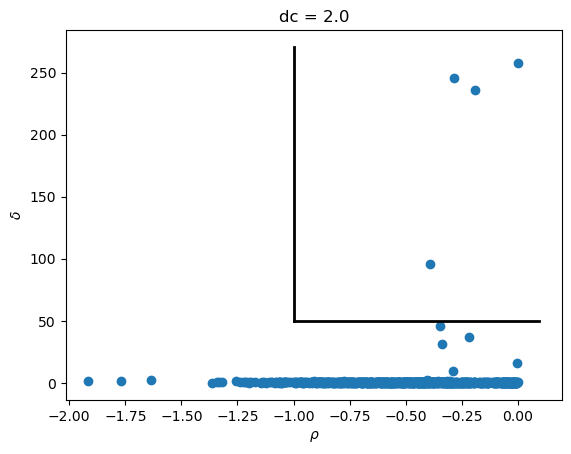

Computation of distances started
Computation of the distances up to 787 NNs started
0.06 seconds for computing distances
Number of points for which self.delta needed call to cdist= 0


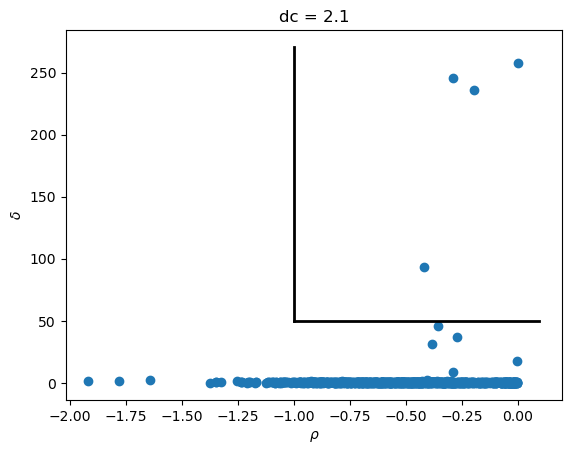

Computation of distances started
Computation of the distances up to 787 NNs started
0.08 seconds for computing distances
Number of points for which self.delta needed call to cdist= 0


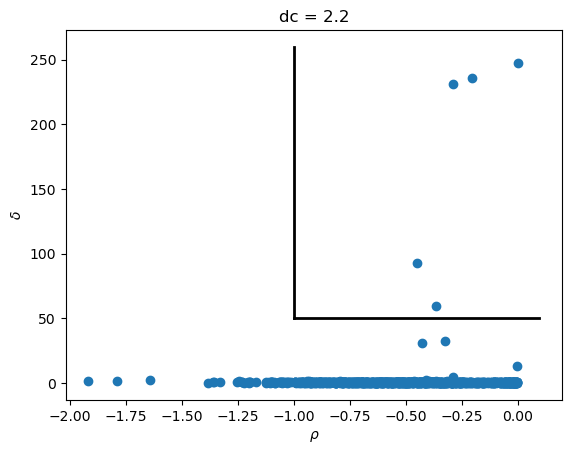

Computation of distances started
Computation of the distances up to 787 NNs started
0.07 seconds for computing distances
Number of points for which self.delta needed call to cdist= 0


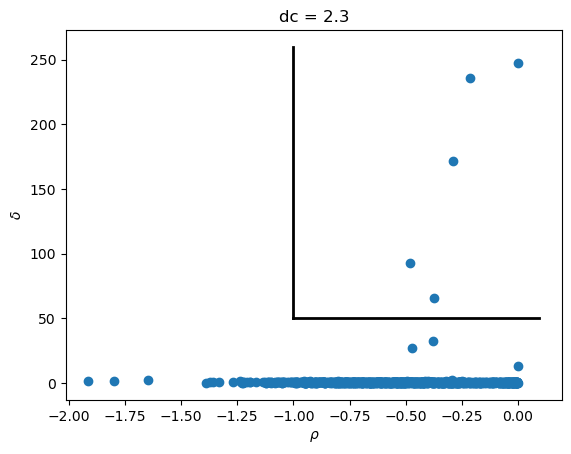

Computation of distances started
Computation of the distances up to 787 NNs started
0.10 seconds for computing distances
Number of points for which self.delta needed call to cdist= 0


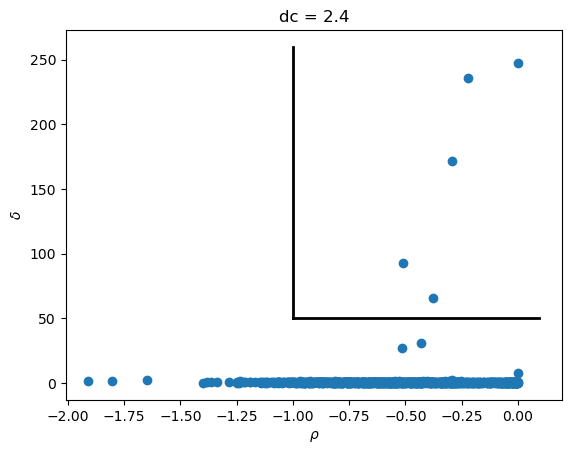

Computation of distances started
Computation of the distances up to 787 NNs started
0.09 seconds for computing distances
Number of points for which self.delta needed call to cdist= 0


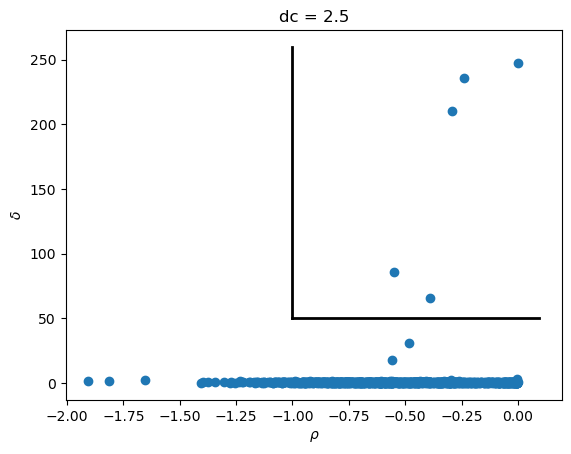

Computation of distances started
Computation of the distances up to 787 NNs started
0.09 seconds for computing distances
Number of points for which self.delta needed call to cdist= 0


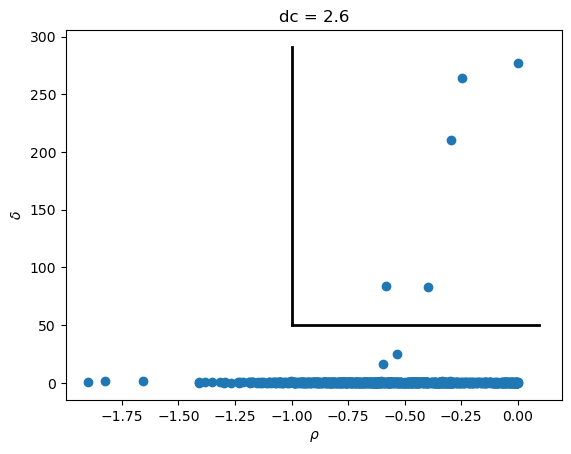

Computation of distances started
Computation of the distances up to 787 NNs started
0.06 seconds for computing distances
Number of points for which self.delta needed call to cdist= 0


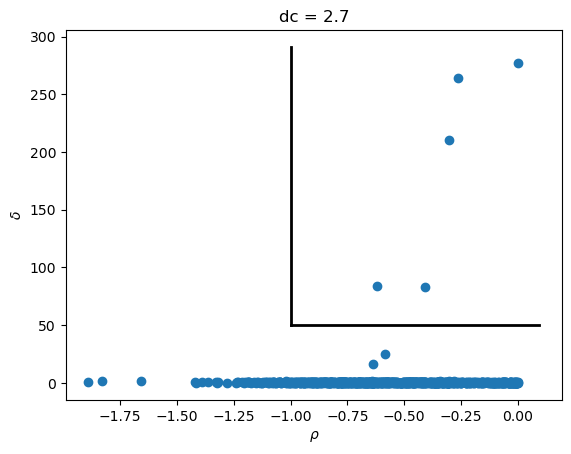

Computation of distances started
Computation of the distances up to 787 NNs started
0.09 seconds for computing distances
Number of points for which self.delta needed call to cdist= 0


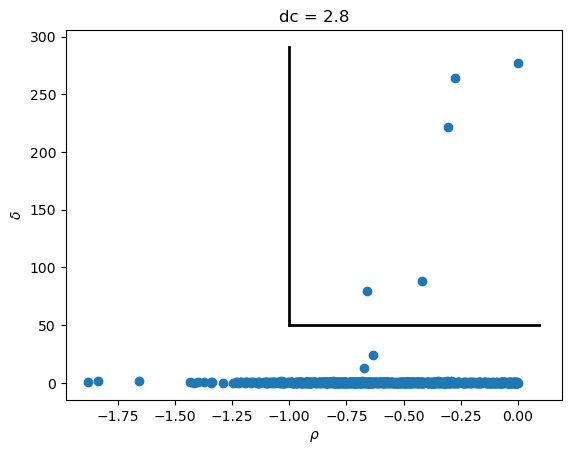

Computation of distances started
Computation of the distances up to 787 NNs started
0.09 seconds for computing distances
Number of points for which self.delta needed call to cdist= 0


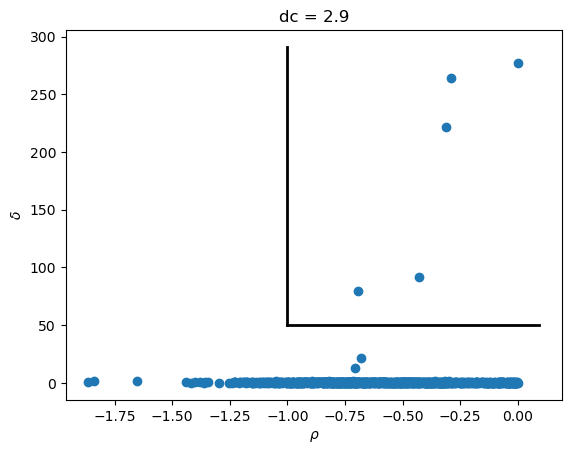

Computation of distances started
Computation of the distances up to 787 NNs started
0.09 seconds for computing distances
Number of points for which self.delta needed call to cdist= 0


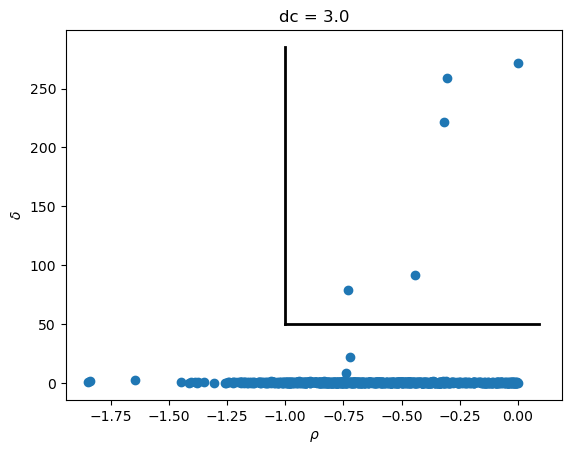

Computation of distances started
Computation of the distances up to 787 NNs started
0.08 seconds for computing distances
Number of points for which self.delta needed call to cdist= 0


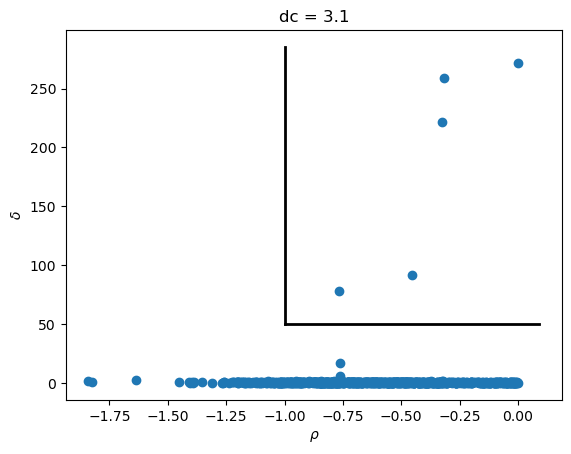

Computation of distances started
Computation of the distances up to 787 NNs started
0.08 seconds for computing distances
Number of points for which self.delta needed call to cdist= 0


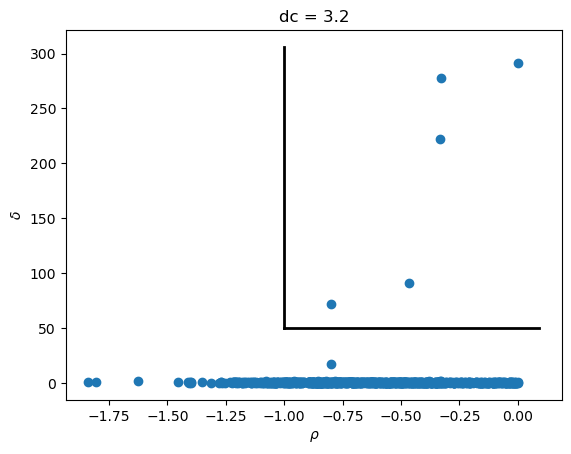

Computation of distances started
Computation of the distances up to 787 NNs started
0.08 seconds for computing distances
Number of points for which self.delta needed call to cdist= 0


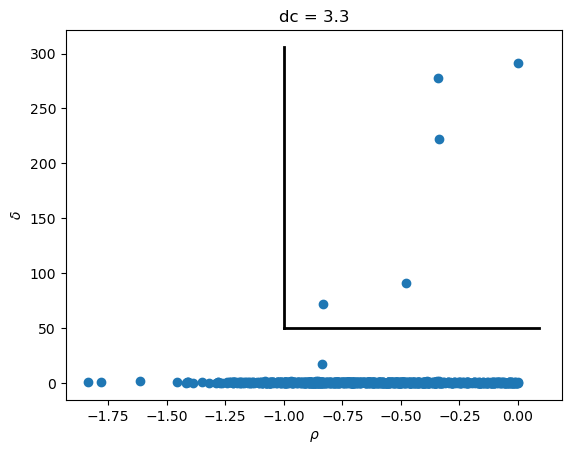

Computation of distances started
Computation of the distances up to 787 NNs started
0.08 seconds for computing distances
Number of points for which self.delta needed call to cdist= 0


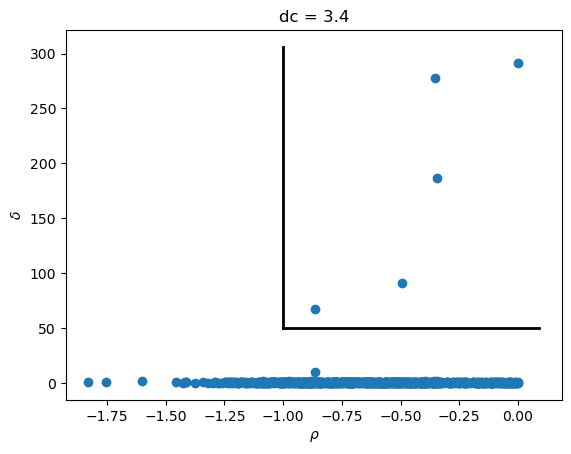

In [11]:
nmi = []

for dc in candidate_dcs:
    data = Data(X, verbose=True)
    data.compute_distances(maxk=X.shape[0]-1, metric = 'sqeuclidean') 
    #equivalent to dist(X, X, 'sqeuclidean') but the library requires the values to be ordered wrt the distance, not only by index

    rho=np.zeros(data.distances.shape[0])

    for i in range(data.distances.shape[0]):
        for j in range(data.distances.shape[1]):
            rho[i] += np.exp(-data.distances[i,j]/(dc)**2) 

    rho = rho/np.max(rho) #in [0,1] range
    data.log_den = np.log(rho)
    data.compute_DecGraph()

    dens_cut = -1
    delta_cut = 50
            #note that these cutoff points should be tailored for each case! 
            #try to run this code by modifying the values of the cuts for each iteration on 'dc' and see if there are sensible changes
            #do you agree on the selection of outliers? Would you have done something different?

    plt.xlabel(r"$\rho$")
    plt.ylabel(r"$\delta$")
    plt.scatter(data.log_den, data.delta)
    bottom,up=plt.ylim()
    left,right=plt.xlim()
    plt.plot([dens_cut, dens_cut], [delta_cut, up], color="k", linestyle="-", linewidth=2)
    plt.plot([dens_cut, right], [delta_cut, delta_cut], color="k", linestyle="-", linewidth=2)
    plt.title(f"dc = {np.round(dc,2)}")
    plt.show()

            #analyse in detail the results of the graph
        

    dp_labels = data.compute_clustering_DP(dens_cut=dens_cut,delta_cut=delta_cut, halo=False)
    nmi.append(normalized_mutual_info_score(y, dp_labels))

Let us choose the ```dc``` parameter whose clustering maximises the NMI with the ground truth. Run density peaks again and visualize the results before moving to point 2.

We will select different cutoff values and present the results, discuss what you find best suited.

In [12]:
dc=candidate_dcs[np.argmax(nmi)] #select the 'dc' that maximises the NMI in the previous runs
print(dc)

2.5000000000000013


In [13]:
#run the algorithm again, with the select value for 'dc'

data = Data(X, verbose=True)
data.compute_distances(maxk=X.shape[0]-1, metric = 'sqeuclidean')

rho=np.zeros(data.distances.shape[0])
for i in range(data.distances.shape[0]):
    for j in range(data.distances.shape[1]):
        rho[i] += np.exp(-data.distances[i,j]/(dc**2))

rho = rho/np.max(rho)
data.log_den = np.log(rho) 


# using a dadapy-implemented density, you can simply do the following:
# note that the densities estimations of dadapy do not use the exponential kernel which was required for this exercise

# data = Data(X, verbose=True)
# data.compute_distances()
# data.compute_id_2NN()
# data.compute_density_kstarNN() 



Computation of distances started
Computation of the distances up to 787 NNs started
0.09 seconds for computing distances


Number of points for which self.delta needed call to cdist= 0


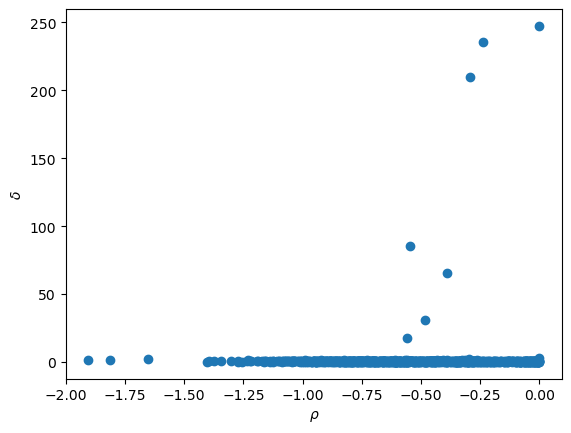

In [14]:
data.compute_DecGraph()
plot_DecGraph(data)

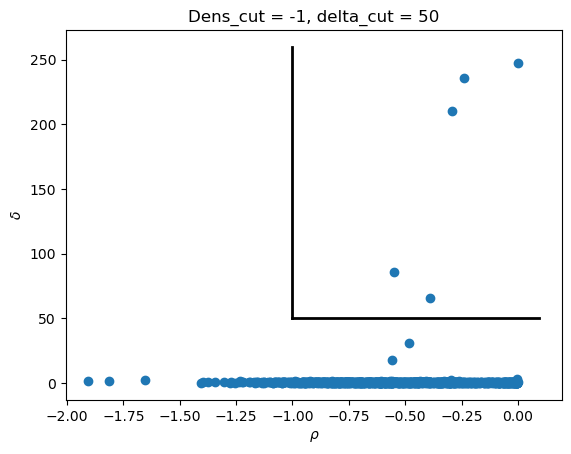

In [22]:
dens_cut = -1
delta_cut = 50

plt.xlabel(r"$\rho$")
plt.ylabel(r"$\delta$")
plt.scatter(data.log_den, data.delta)
bottom,up=plt.ylim()
left,right=plt.xlim()
plt.plot ([dens_cut, dens_cut], [delta_cut, up], color="k", linestyle="-", linewidth=2)
plt.plot ([dens_cut, right], [delta_cut, delta_cut], color="k", linestyle="-", linewidth=2)
plt.title(f"Dens_cut = {dens_cut}, delta_cut = {delta_cut}")
plt.show()

dp_labels_1 = data.compute_clustering_DP(dens_cut=dens_cut,delta_cut=delta_cut, halo=False)

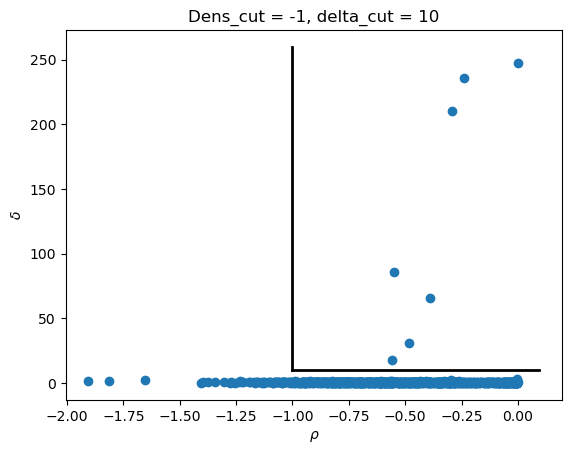

In [28]:
dens_cut = -1
delta_cut = 10

plt.xlabel(r"$\rho$")
plt.ylabel(r"$\delta$")
plt.scatter(data.log_den, data.delta)
bottom,up=plt.ylim()
left,right=plt.xlim()
plt.plot ([dens_cut, dens_cut], [delta_cut, up], color="k", linestyle="-", linewidth=2)
plt.plot ([dens_cut, right], [delta_cut, delta_cut], color="k", linestyle="-", linewidth=2)
plt.title(f"Dens_cut = {dens_cut}, delta_cut = {delta_cut}")
plt.show()

dp_labels_2 = data.compute_clustering_DP(dens_cut=dens_cut,delta_cut=delta_cut, halo=False)

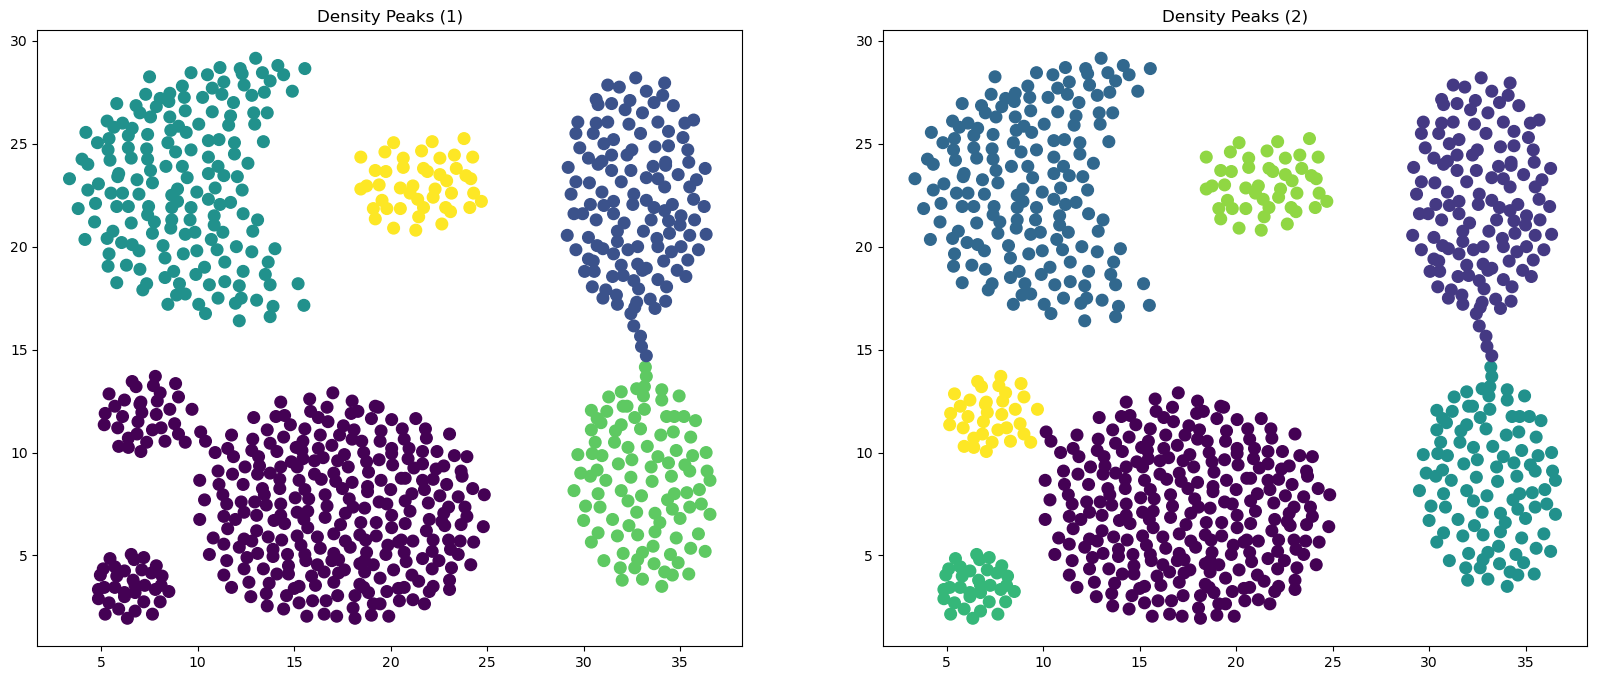

In [43]:
fig, ax = plt.subplots(1,2,figsize=(20,8))

ax[0].scatter(X[:,0], X[:,1], c=dp_labels_1, s=70)
ax[0].set_title("Density Peaks (1)")

ax[1].scatter(X[:,0], X[:,1], c=dp_labels_2, s=70)
ax[1].set_title("Density Peaks (2)")
plt.show()

2. Compute the NMI with the ground truth and the F-ratio test for this assignation.

Note: have a look at [this](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.cluster) documentation page for more cluster validation measures implemented in sklearn.

In [31]:
print(f"NMI of version 1: {normalized_mutual_info_score(y, dp_labels_1)}")
print(f"NMI of version 2: {normalized_mutual_info_score(y, dp_labels_2)}")

NMI of version 1: 0.9113520827208265
NMI of version 2: 1.0


In [33]:
def F_ratio(X, labels): #not implemented in sklearn
    '''
    Computes the F-ratio variance test (WB-index), defined as:
    F = k*W / B

    having  k: the number of clusters
            W: the within cluster variance (sum_{i}^{N} ||x_i - c_p(i)||^2)
            B: the between cluster variance (sum_{j}^{k} n_j * ||c_j - x_bar||^2)
    '''

    k = len(np.unique(labels)) #number of clusters

    W, B = 0.0, 0.0
    X_mean = np.mean(X, axis=0)

    for k_id in range(k):
        cluster_k = X[labels==k_id]
        mean_k = np.mean(cluster_k, axis=0)

        W += np.sum((cluster_k - mean_k)**2)
        B += len(cluster_k)*np.sum((mean_k - X_mean)**2)

        
    if B == 0:
        return None
    
    return k*W / B

In [34]:
print(f"F-ratio of version 1: {F_ratio(X, dp_labels_1)}")
print(f"F-ratio of version 2: {F_ratio(X, dp_labels_2)}")

F-ratio of version 1: 0.9084228217879363
F-ratio of version 2: 0.7591970240508624


3. Perform $k$-means with $k$ equal to the true number of clusters, compute the NMI with the ground truth and the F-ratio test.

In [36]:
from sklearn.cluster import KMeans

In [37]:
kmeans = KMeans(n_clusters=n_classes) #init='k-means++', n_init=1
kmeans.fit(X)

KMeans(n_clusters=7)

In [38]:
km_labels = kmeans.labels_

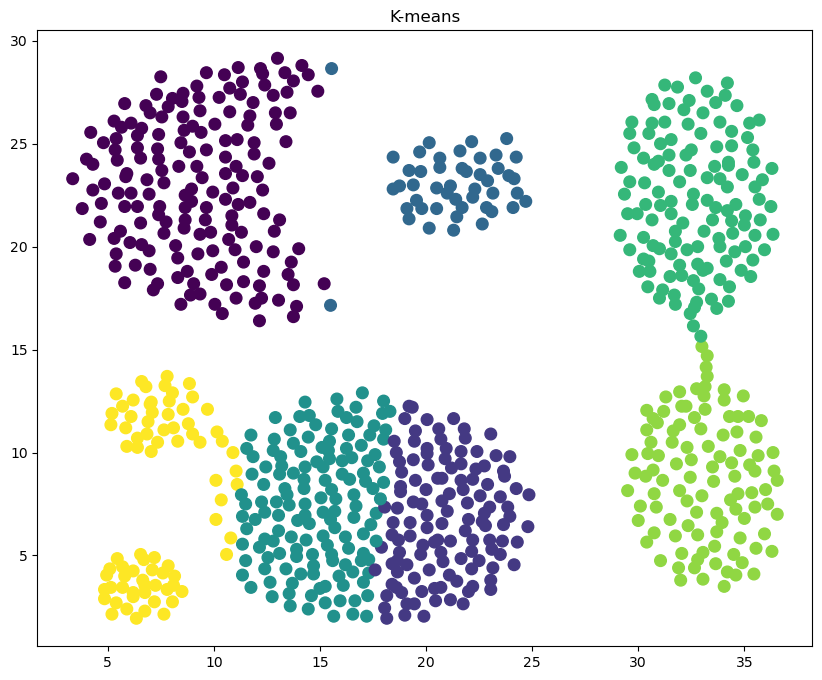

In [40]:
plt.figure(figsize=(10,8))

plt.scatter(X[:,0], X[:,1], c=km_labels, s=70)
plt.title("K-means")
plt.show()

In [41]:
print(f"NMI of k-means: {normalized_mutual_info_score(y, km_labels)}")

NMI of k-means: 0.8791915183448882


In [42]:
print(f"F-ratio of k-means: {F_ratio(X, dp_labels_1)}")

F-ratio of k-means: 0.9084228217879363


4. Apply the ```sklearn``` implementation of DBSCAN and MeanShift to the dataset. Discuss the differences among the obtained results.

In [82]:
from sklearn.cluster import DBSCAN, MeanShift, estimate_bandwidth

Note: setting the hyperparameters of these methods is not at all easy (no rule of thumb unfortunately). We propose some results (obtained via a trial and error approach): which hyperparameters seems to best fit the problem?

For DBSCAN, when you see ```Derived n_clust = 0``` it means that all points are assigned the label ```-1``` which is the one corresponding to the noise.

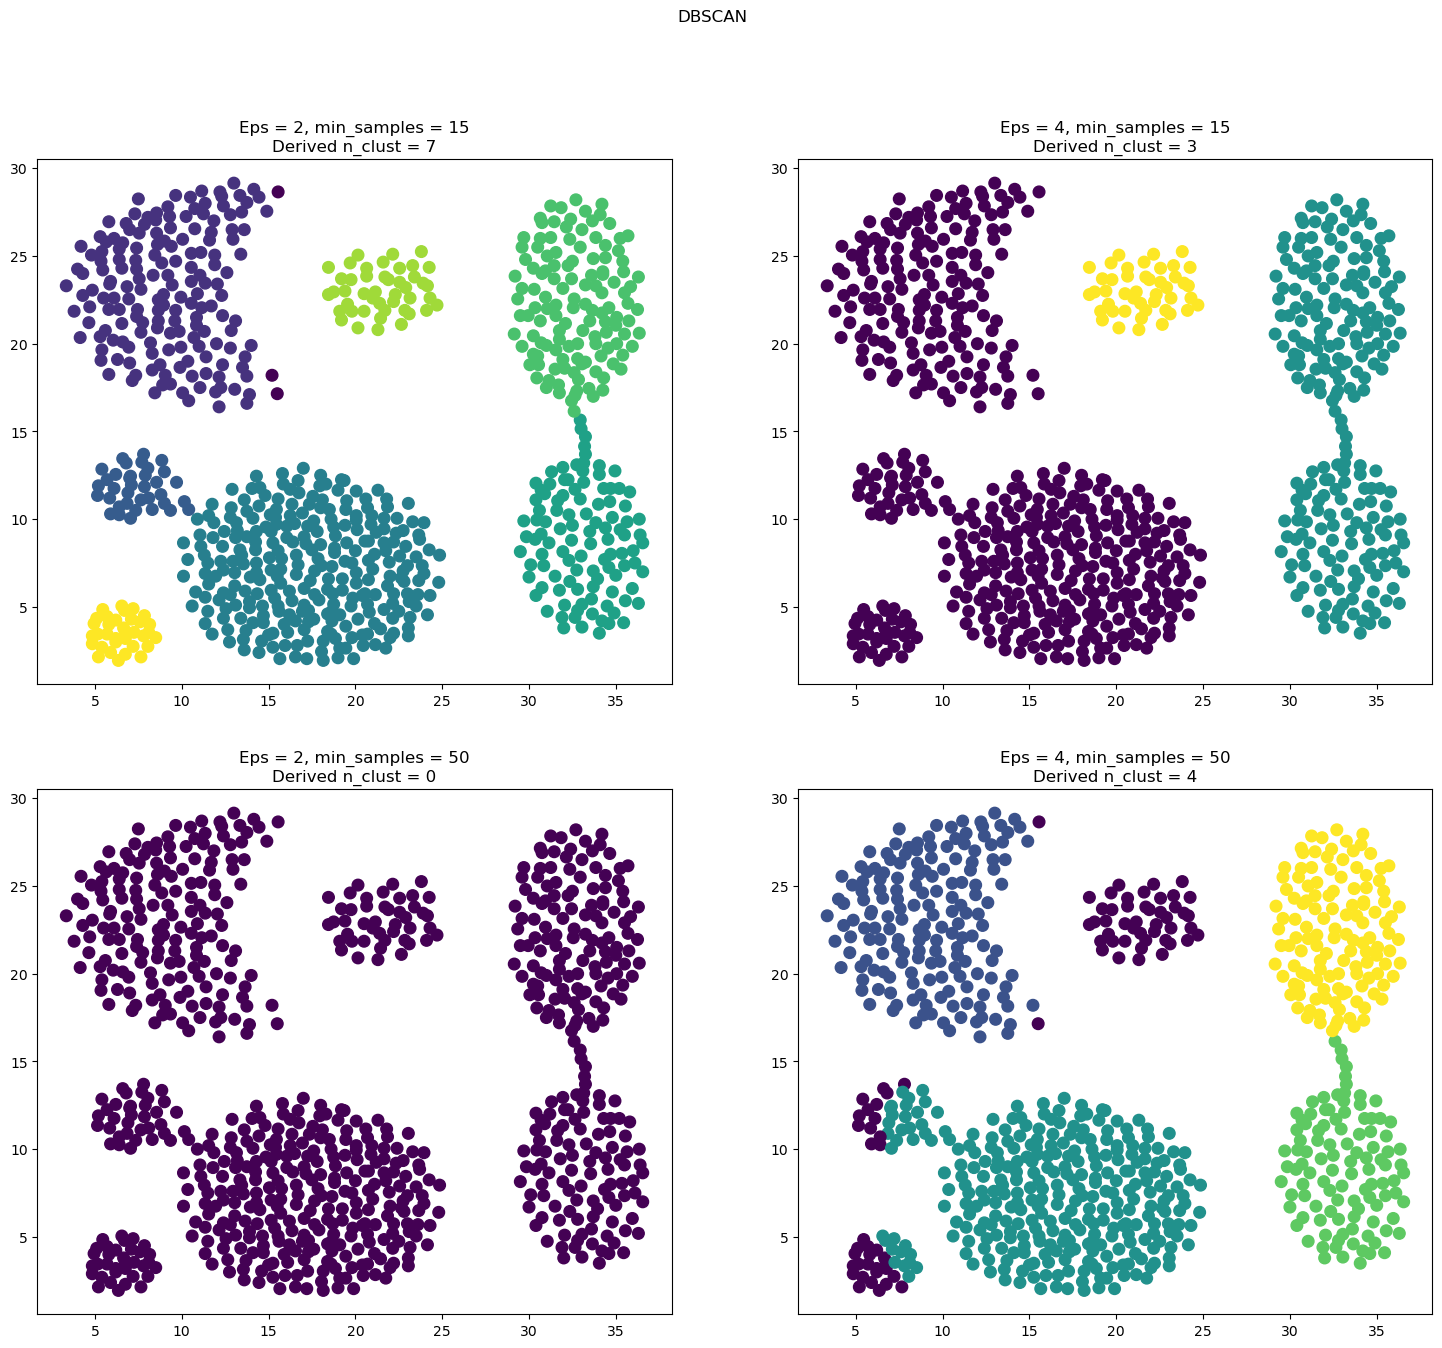

In [83]:
fig, ax = plt.subplots(2,2, figsize=(18,15))

for i, (eps, min_samples) in enumerate([(2, 15),(4, 15),(2, 50),(4, 50)]):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X)
    dbs_labels = dbscan.labels_

    ax_ = ax[i//2, i%2]

    ax_.scatter(X[:,0], X[:,1], c=dbs_labels, s=70)
    ax_.set_title(f"Eps = {eps}, min_samples = {min_samples}\nDerived n_clust = {np.max(dbs_labels)+1}")

plt.suptitle("DBSCAN")
plt.show()

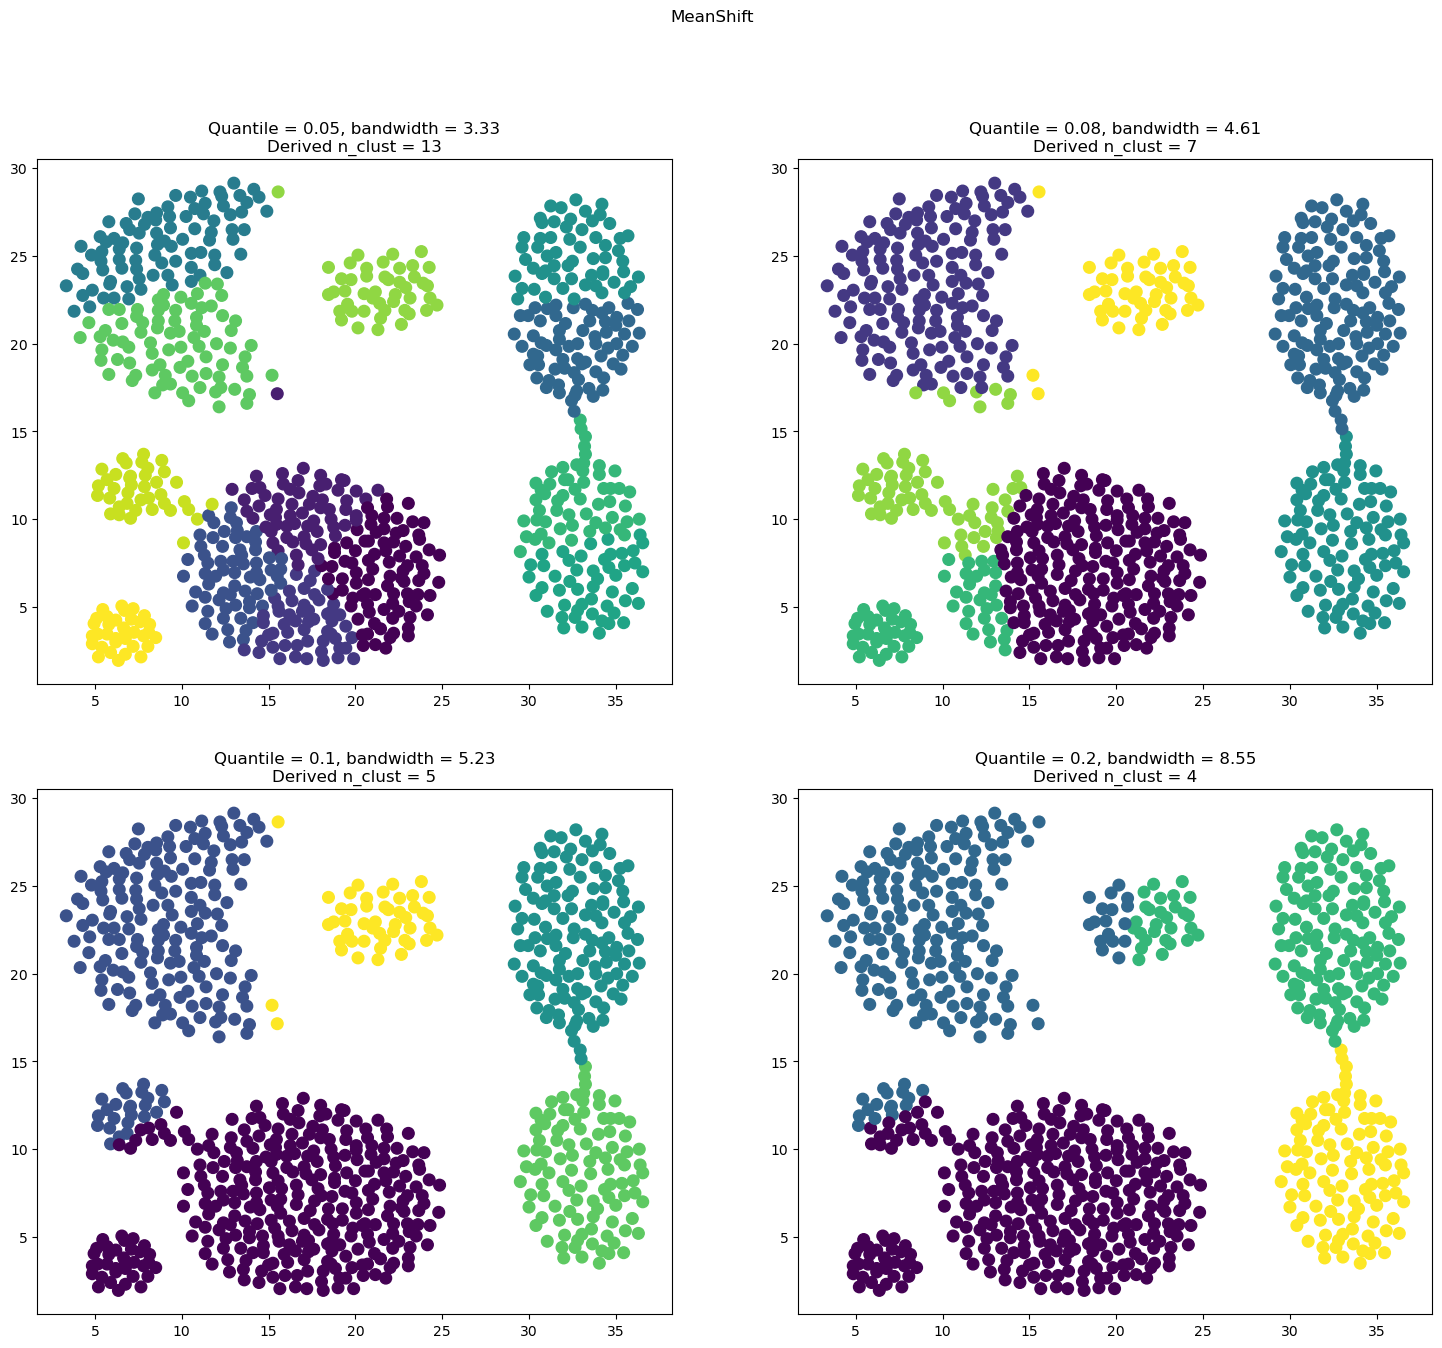

In [84]:
fig, ax = plt.subplots(2,2, figsize=(18,15))

for i, quantile in enumerate([0.05, 0.08, 0.1, 0.2]):
    bandwidth = estimate_bandwidth(X, quantile=quantile, n_samples=X.shape[0]) 
    
    meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)  #here you can set the 'bandwidth' parameter direcly, but we relied on its estimation
    meanshift.fit(X)

    ms_labels = meanshift.labels_
    ax_ = ax[i//2, i%2]

    ax_.scatter(X[:,0], X[:,1], c=ms_labels, s=70)
    ax_.set_title(f"Quantile = {quantile}, bandwidth = {np.round(bandwidth,2)}\nDerived n_clust = {np.max(ms_labels)+1}")

plt.suptitle("MeanShift")
plt.show()